In [1]:
import numpy as np
import os, flopy
import matplotlib.pyplot as plt

In [2]:
name = 'Model'
workspace = '../modelData/model'
mf_exe_name = '../modelData/exe/mf6'

sim = flopy.mf6.MFSimulation.load(sim_name=name, exe_name=mf_exe_name, sim_ws=workspace)

mfmodel = sim.get_model(model_name='model')

flopy.export.shapefile_utils.model_attributes_to_shapefile('../outputData/shps/modelAttributes.shp', mfmodel)

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package disv...
    loading package npf...
    loading package ic...
    loading package rch...
    loading package evt...
    loading package drn...
    loading package oc...
  loading ims package model...
Failed to get data for idomain array, disv package
Failed to get data for angle1 array, npf package
Failed to get data for angle2 array, npf package
Failed to get data for angle3 array, npf package
Failed to get data for k22 array, npf package
Failed to get data for wetdry array, npf package
Failed to get data for aux array, rcha package
Failed to get data for irch array, rcha package
Failed to get data for aux(iaux) array, evta package
Failed to get data for ievt array, evta package
wrote ../outputData/shps/modelAttributes.shp


In [3]:
fname = os.path.join(workspace, name + '.disv.grb')
grd = flopy.utils.MfGrdFile(fname, verbose=False)
iverts, verts = grd.get_verts()
vertc = grd.get_centroids()
mg = grd.get_modelgrid()

fname = os.path.join(workspace, name + '.hds')
hdobj = flopy.utils.HeadFile(fname)
head = hdobj.get_data()
head.shape

(6, 1, 21793)

In [4]:
nCells = head.shape[2]
waterTableArray = np.zeros([nCells])
for cell in range(nCells):
    cellWTIndex = np.where(head[:,0,cell]>-1E30)
    cellWT = head[:,0,cell][cellWTIndex[0][0]]
    waterTableArray[cell] = cellWT

<a list of 53 text.Text objects>

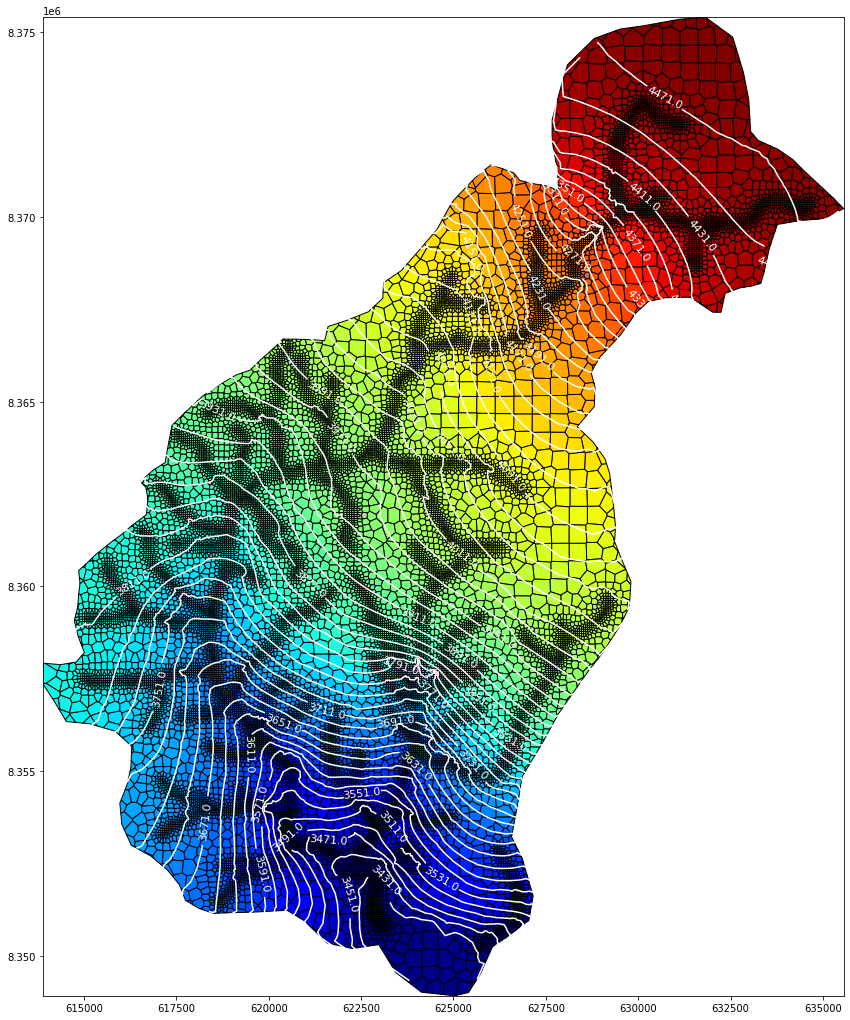

In [5]:
cint = 20
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
mm = flopy.plot.PlotMapView(modelgrid=mg, ax=ax)
ax.set_xlim(mg.extent[0], mg.extent[1])
ax.set_ylim(mg.extent[2], mg.extent[3])
v = mm.plot_cvfd(verts, iverts, edgecolor='black', a=waterTableArray,cmap='jet')
hmin = head[head >-1E30].min()
hmax = head[:, 0, :].max()
levels = np.arange(np.floor(hmin), np.ceil(hmax) + cint, cint)
cs = mm.contour_array_cvfd(vertc, waterTableArray, colors='white',levels=levels)
plt.clabel(cs, fmt='%.1f', colors='white', fontsize=11)